### 군집화란
- 군집화 : 데이터 포인트들을 별개의 군집으로 그룹화 하는 것을 의미
- 유사성이 높은 데이터들을 동일한 그룹으로 분류, 서로 다른 군집들이 상이성을 가지도록 그룹화
- 군집화 활용 분야
    - 고객, 마켓, 브랜드, 사회 경제 활동 세분화
    - image 검출, 세분화, 트랙킹
    - 이상 검출

### 군집화 알고리즘 종류
- K-Means   # centroid(군집 중심점) 기반
- Mean Shift    # centroid(군집 중심점) 기반
- Gaussian Mixture Model    # 데이터 정규분포 기반
- DBSCAN    # 데이터 밀도 기반

---

## K-Means Clustering

1. 2개의 군집 중심점을 설정
2. 각 데이터들은 가장 가까운 중심점에 소속
3. 중심점에 할당된 데이터들의 평균 중심으로 중심점 이동
4. 각 데이터들은 이동된 중심점 기준으로 가장 가까운 중심점에 소속
5. 다시 중심점에 할당된 데이터들의 평균 중심으로 중심점 이동

### K-Means의 장단점
- 장점
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
    - 알고리즘이 쉽고 간결
    - 대용량 데이터에도 활용이 가능
- 단점
    - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐(이를 위해 PCA로 차원 축소를 적용해야 할 수도 있음)
    - 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 느려짐
    - 이상치 데이터에 취약

### 사이킷런 K-Means 클래스
- 주요 파라미터
    - n_clusters : 군집 중심점의 갯수
    - init : 초기에 군집 중심점의 좌표를 설정할 방식
    - max_iter : 최대 반복 횟수
- 주요 속성
    - labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
    - cluster_centers_ : 각 군집 중심점 좌표

## 실습 : 붓꽃 데이터 K-Means clustering

In [3]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

iris = load_iris()

# 피처 데이터만 별도로 저장
irisDF = pd.DataFrame(data = iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

print(irisDF.shape)
irisDF.head(3)

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


### 붓꽃 데이터에 Kmeans 군집화 수행

In [4]:
# kmeans 객체 생성
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)

# 붓꽃 데이터에 군집화 수행
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [5]:
# 각 데이터들마다 centroid(군집 중심점) 할당됨
print(kmeans.labels_)

irisDF['cluster'] = kmeans.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [6]:
# 타겟별 군집 중심점 확인
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


### 군집화 결과 시각화(PCA 2차원 변환)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


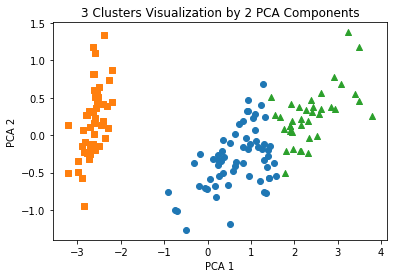

In [8]:
# cluster 값이 0, 1, 2인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출, o, s, ^로 marker 표시
plt.scatter(x = irisDF.loc[marker0_ind, 'pca_x'], y = irisDF.loc[marker0_ind, 'pca_y'], marker = 'o')
plt.scatter(x = irisDF.loc[marker1_ind, 'pca_x'], y = irisDF.loc[marker1_ind, 'pca_y'], marker = 's')
plt.scatter(x = irisDF.loc[marker2_ind, 'pca_x'], y = irisDF.loc[marker2_ind, 'pca_y'], marker = '^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### K-means 수행 후 개별 클러스터의 군집 중심 시각화

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 클러스터링 할 데이터 생성 - make_blobs (생성할 데이터 200개, 데이터 피처 갯수 2개, 군집 갯수 3개, 데이터 표준편차 0.8)
X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std= 0.8, random_state = 0)
print(X.shape, y.shape)

(200, 2) (200,)


In [11]:
# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

[0 1 2] [67 67 66]


In [12]:
clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y

print(clusterDF.shape)
clusterDF.head(3)

(200, 3)


,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


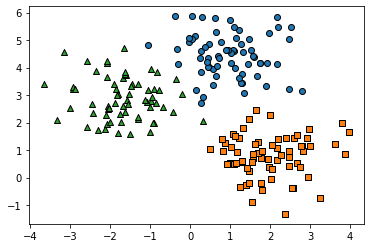

In [13]:
# make_blobs로 만들어진 데이터 시각화
target_list = np.unique(y)

# 각 target별 scatter plot의 market 값들.
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0, 1, 2]
# target == 0, target == 1, target == 2로 scatter plot을 marker별로 생성

for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'], edgecolors = 'k', marker = markers[target])

plt.show()

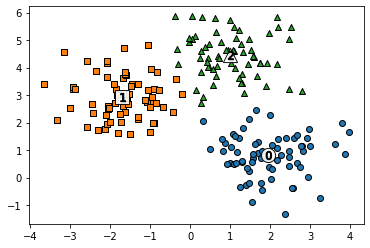

In [17]:
# K-means 군집화 수행하고 개별 클러스터의 군집 중심 시각화

# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster center는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolors = 'k', marker = markers[label])

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white', alpha = 0.9, edgecolors = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolors = 'k', marker = '$%d$' % label)

plt.show()

In [18]:
kmeans.cluster_centers_

array([[ 1.95763312,  0.81041752],
       [-1.70636483,  2.92759224],
       [ 0.990103  ,  4.44666506]])

In [19]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64
